In [3]:
import pandas as pd

project_dir = '/Users/David/Work/data_science/food_environment/'

# Source data from https://catalog.data.gov/dataset/food-environment-atlas-f4a22
# Simply exported each spreadsheet in Excel to CSV
restaurants = pd.read_csv(project_dir + 'data/RESTAURANTS.csv')
restaurants.head()

,FIPS,State,County,FFR09,FFR14,PCH_FFR_09_14,FFRPTH09,FFRPTH14,PCH_FFRPTH_09_14,FSR09,FSR14,PCH_FSR_09_14,FSRPTH09,FSRPTH14,PCH_FSRPTH_09_14,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12
0,1001,AL,Autauga,30,36,20.000000,0.554170,0.649878,17.270512,34,29,-14.705882,0.628059,0.523513,-16.645960,649.511367,674.80272,484.381507,512.280987
1,1003,AL,Baldwin,112,132,17.857143,0.624282,0.659634,5.662750,202,221,9.405941,1.125938,1.104387,-1.914027,649.511367,674.80272,484.381507,512.280987
2,1005,AL,Barbour,21,22,4.761905,0.759301,0.818239,7.762116,12,15,25.000000,0.433887,0.557890,28.579797,649.511367,674.80272,484.381507,512.280987
3,1007,AL,Bibb,7,5,-28.571429,0.305131,0.222163,-27.190844,6,5,-16.666667,0.261540,0.222163,-15.055985,649.511367,674.80272,484.381507,512.280987
4,1009,AL,Blount,24,21,-12.500000,0.418549,0.363832,-13.073035,19,15,-21.052632,0.331351,0.259880,-21.569656,649.511367,674.80272,484.381507,512.280987


In [10]:
variable_list = pd.read_csv(project_dir + 'data/Variable_List.csv')
variable_list[variable_list['Category Code'] == 'RESTAURANTS'][['Variable Name','Variable Code']]

,Variable Name,Variable Code
77,"Fast-food restaurants, 2009",FFR09
78,"Fast-food restaurants, 2014",FFR14
79,"Fast-food restaurants (% change), 2009-14",PCH_FFR_09_14
80,"Fast-food restaurants/1,000 pop, 2009",FFRPTH09
81,"Fast-food restaurants/1,000 pop, 2014",FFRPTH14
82,"Fast-food restaurants/1,000 pop (% change), 20...",PCH_FFRPTH_09_14
83,"Full-service restaurants, 2009",FSR09
84,"Full-service restaurants, 2014",FSR14
85,"Full-service restaurants (% change), 2009-14",PCH_FSR_09_14
86,"Full-service restaurants/1,000 pop, 2009",FSRPTH09


In [19]:
# How has the restaurant landscape evolved?
# What's the ratio of fast-food to full-service restaurants over time?
restaurants['FFR_FSR_ratio_09'] = restaurants['FFR09'] / restaurants['FSR09']
restaurants['FFR_FSR_ratio_14'] = restaurants['FFR14'] / restaurants['FSR14']

restaurants[['State', 'County', 'FFR09', 'FSR09', 'FFR_FSR_ratio_09', 'FFR14', 'FSR14', 'FFR_FSR_ratio_14']]

,State,County,FFR09,FSR09,FFR_FSR_ratio_09,FFR14,FSR14,FFR_FSR_ratio_14
0,AL,Autauga,30,34,0.882353,36,29,1.241379
1,AL,Baldwin,112,202,0.554455,132,221,0.597285
2,AL,Barbour,21,12,1.750000,22,15,1.466667
3,AL,Bibb,7,6,1.166667,5,5,1.000000
4,AL,Blount,24,19,1.263158,21,15,1.400000
5,AL,Bullock,4,2,2.000000,3,1,3.000000
6,AL,Butler,17,19,0.894737,17,10,1.700000
7,AL,Calhoun,95,67,1.417910,103,77,1.337662
8,AL,Chambers,22,19,1.157895,26,16,1.625000
9,AL,Cherokee,16,10,1.600000,15,11,1.363636


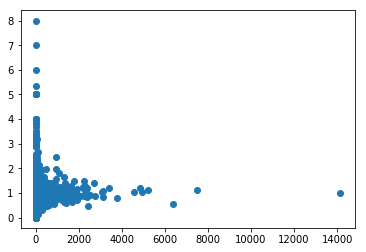

In [20]:
# Do small numbers bias us toward a ratio?
restaurants['total_restaurants_09'] = restaurants['FFR09'] + restaurants['FSR09']
restaurants['total_restaurants_14'] = restaurants['FFR14'] + restaurants['FSR14']

import matplotlib.pyplot as plt

plt.scatter(restaurants['total_restaurants_09'], restaurants['FFR_FSR_ratio_09'])
plt.show()

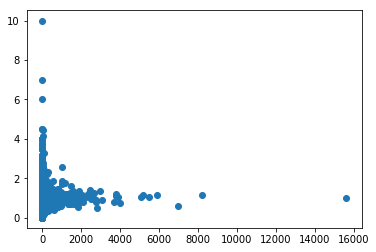

In [21]:
# Looks like a smaller restaurant industry is biased toward greater proportion of FSRs
# Does that also hold true for '14? I'm guessing so

plt.scatter(restaurants['total_restaurants_14'], restaurants['FFR_FSR_ratio_14'])
plt.show()

In [24]:
# I'm barely seeing any change, which makes sense given that restaurants exist for years, and the period is only 5 years
# These outliers could tell us something about these communities
# Are counties with high ratios predominantly "road" towns, with many people passing through and grabbing food as a convenience on their way elsewhere?
# To look at it from the supply side, do these communities lack the resources/conditions to open and operate FSRs, which presumably have more barriers to entry?
# To invert that question, for communities with low ratios, is something "lacking" that keeps them from opening FFRs?

# Interesting that there seems to be a convergence on 1:1 for counties with large industries
# I'm guessing that county with ~16000 restaurants is a county covering NYC or LA
restaurants[restaurants['total_restaurants_14'] > 3000] \
.sort_values(by='total_restaurants_14')

,FIPS,State,County,FFR09,FFR14,PCH_FFR_09_14,FFRPTH09,FFRPTH14,PCH_FFRPTH_09_14,FSR09,...,FSRPTH14,PCH_FSRPTH_09_14,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12,FFR_FSR_ratio_09,FFR_FSR_ratio_14,total_restaurants_09,total_restaurants_14
228,6085,CA,Santa Clara,1282,1434,11.856474,0.726289,0.756886,4.212752,1458,...,0.869838,5.307529,761.447125,642.487458,755.587505,750.318646,0.879287,0.870146,2740,3082
362,12086,FL,Miami-Dade,1430,1640,14.685315,0.580371,0.615876,6.117705,1691,...,0.762710,11.133849,632.337378,530.267589,919.513104,882.935180,0.845653,0.807484,3121,3671
1868,36081,NY,Queens,1583,1960,23.815540,0.713975,0.844253,18.246886,1517,...,0.780934,14.137086,487.557187,482.410232,734.805659,916.417933,1.043507,1.081081,3100,3773
2579,48113,TX,Dallas,1837,2067,12.520414,0.782909,0.820682,4.824680,1554,...,0.687276,3.771544,784.256146,728.768645,658.537240,688.356372,1.182111,1.194107,3391,3798
1851,36047,NY,Kings,1621,1994,23.010487,0.651593,0.760548,16.721443,1494,...,0.735756,22.515247,487.557187,482.410232,734.805659,916.417933,1.085007,1.033696,3115,3923
2970,53033,WA,King,1678,1720,2.502980,0.877610,0.826936,-5.774021,2091,...,1.106268,1.157190,683.838863,505.260816,713.269544,706.806851,0.802487,0.747501,3769,4021
222,6073,CA,San Diego,2332,2632,12.864494,0.761792,0.806513,5.870517,2216,...,0.757485,4.639681,761.447125,642.487458,755.587505,750.318646,1.052347,1.064725,4548,5104
103,4013,AZ,Maricopa,2674,2781,4.001496,0.702985,0.680418,-3.210125,2191,...,0.583286,1.263799,760.500461,577.718809,758.628372,623.588015,1.220447,1.166527,4865,5165
215,6059,CA,Orange,2526,2790,10.451306,0.845614,0.886977,4.891441,2407,...,0.858047,6.486852,761.447125,642.487458,755.587505,750.318646,1.049439,1.033716,4933,5489
2623,48201,TX,Harris,2738,3125,14.134405,0.678585,0.703612,3.688058,2481,...,0.624807,1.612792,784.256146,728.768645,658.537240,688.356372,1.103587,1.126126,5219,5900


In [ ]:
# It could be interesting to look at links between restaurant landscape and socioeconomics and public health
# What does the restaurant landscape look like for a physically healthy community? An economically healthy one?
# I'm going to deliberately avoid suggesting any causality for now